# Biblioteka Pandas

**Pandas** jest darmową biblioteką języka Python, która służy do analizy danych. Zawiera łatwe w użyciu struktury i narzędzia do analizy danych spotykane w języku R.

Biblioteka ta pozwala między innymi na:
  
  * tworzenie własnych danych w odpowiednich strukturach,
  * importowanie i eksportowanie danych do różnych plików,
  * przygotowanie danych do analizy (pozbycie się anomalii w danych, np. brakujących wartości),
  * analizę danych,
  * prezentację danych.

Do instalacji tej biblioteki można użyć procedury **pip** albo **conda** [http://pandas.pydata.org/pandas-docs/stable/install.html]

Aby skorzystać z biblioteki pandas należy ją wcześniej zaimportować, np.:

In [1]:
# import pandas
import pandas as pd

print(pd.__version__) # wersja biblioteki
%matplotlib inline

2.2.3


## Struktury danych

Biblioteka pandas wprowadza dwie nowe struktury danych do Pythona: **Series** i **DataFrame**.

1. **Serie**

Seria to jednowymiarowy obiekt podobny do tablicy, listy, który może zawierać różnego rodzaju dane (liczby całkowite, zmiennoprzecinkowe, ciągi, obiekty Pythona, itd.). Każdy element serii ma przypisany indeks/etykietę (domyślnie od 0 do N, gdzie N jest długość serii minus 1).

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
print(s)

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object


Alternatywnie, można zdefiniować indeksy elementów serii w trakcje jej definicji:

In [ ]:
import numpy as np

# Series(dane, index=indeks)
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s)

a   -0.549234
b    0.679250
c    2.144546
i   -0.261919
e   -0.151553
dtype: float64


Konstruktor **Series** może przetwarzać słowniki Pythona:

In [ ]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
print(Series(d))

a    0.0
b    1.0
c    2.0
dtype: float64


In [ ]:
print(Series(d, index=['b', 'c', 'd', 'a']))

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [ ]:
print(Series(1, index=['a', 'b', 'c', 'd', 'e']), '\n')
print(Series(1., index=['a', 'b', 'c', 'd', 'e']))

a    1
b    1
c    1
d    1
e    1
dtype: int64 

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64


## 1.1 Odwoływanie się do elementów serii

Struktura Series działa jak tablica. Można odwołać się do poszczególnego elementu serii za pomocą indeksu, używać logicznego indeksowania, itd.:

In [ ]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')

print(s[0], s[3])

a    0.658887
b    0.786614
c   -0.452638
i   -1.455700
e   -1.199088
dtype: float64 

0.6588874879366847 -1.455700308849256


In [ ]:
print(s[s > 0.5], '\n')
print(s[s > s.mean()])

a    0.658887
b    0.786614
dtype: float64 

a    0.658887
b    0.786614
dtype: float64


## 1.2 Zmiana wartości wybranych elementów

In [ ]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')
print("stara wartosc:",  s[0])
s[0] = 10.
print("nowa wartosc:",  s[0], '\n')

print("stara wartosc:",  s['b'])
s['b'] = 15.
print("nowa wartosc:",  s['b'])

a    0.350033
b   -0.471139
c   -0.461294
i    1.322515
e   -0.983739
dtype: float64 

stara wartosc: 0.35003295927739314
nowa wartosc: 10.0 

stara wartosc: -0.47113931749810284
nowa wartosc: 15.0


In [ ]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print("stare:\n",  s, '\n')
s[s < s.mean()] = 1
print("nowe:\n",  s)

stare:
 a    0.704046
b   -0.885024
c    0.156746
i    1.339003
e   -0.157302
dtype: float64 

nowe:
 a    0.704046
b    1.000000
c    1.000000
i    1.339003
e    1.000000
dtype: float64


## 1.5 Niezdefiniowane wartości, obiekty

In [ ]:
cities = Series({'Chicago': 1000, 'New York': 1300, 'Portland': 900,
                 'San Francisco': 1100, 'Austin': 450, 'Boston': None})
print(cities, '\n')

print('Seattle' in cities)
print('San Francisco' in cities)

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64 

False
True


In [ ]:
print(cities, '\n')
print(cities.notnull()) # które są zdefiniowane

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64 

Chicago           True
New York          True
Portland          True
San Francisco     True
Austin            True
Boston           False
dtype: bool


In [ ]:
print(cities.isnull()) # które nie są zdefiniowane

Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston            True
dtype: bool


In [ ]:
print(cities[cities.isnull()]) # tylko te które nie są zdefiniowane
cities[cities.isnull()] = 1
print()
print(cities.isnull())
print()
print(cities)

Boston   NaN
dtype: float64

Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston           False
dtype: bool

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              1.0
dtype: float64


# 2. DataFrame

<i>DataFrame</i> to struktura danych składa się z wierszy i kolumn, podobna do arkusza kalkulacyjnego, baz danych, tabeli 2-wymiarowej lub data.frame obiektu z języka R.

Poniżej przedstawiam kilka sposobów definiowania struktury DataFrame:

  * ze słownika list/tablic

In [ ]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
print(DataFrame(d))
DataFrame(d)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0


,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## 2.1 Podstawowe informacje
Biblioteka pandas ma wiele funkcji, które dostarczają nam podstawowej informacji na DataFrame. Jedną z takich funkcji jest metoda **info**.

In [ ]:
data = [{'a': 1, 'b': 2},
         {'a': 5, 'b': 10, 'c': 20}]
df = DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
a    2 non-null int64
b    2 non-null int64
c    1 non-null float64
dtypes: float64(1), int64(2)
memory usage: 128.0 bytes


## 2.2 Wybieranie rekordów, kolumn, elementów

Jak już wspomniałem strukturę DataFrame możemy traktować jako grupę/tablicę serii, które dzielą indeks (w tym przypadku nagłówki kolumn). Dzięki temu możemy w łatwy sposób wybrać konkretne rekordy.

In [ ]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
print (football)

football.head(3)

   year     team  wins  losses
0  2010    Bears    11       5
1  2011    Bears     8       8
2  2012    Bears    10       6
3  2011  Packers    15       1
4  2012  Packers    11       5
5  2010    Lions     6      10
6  2011    Lions    10       6
7  2012    Lions     4      12


,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6


In [ ]:
football['year'].head(4)

0    2010
1    2011
2    2012
3    2011
Name: year, dtype: int64

In [ ]:
football.tail(3)

,year,team,wins,losses
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Możemy też modyfikować DataFrame na podstawie wybranej kolumny.

In [ ]:
football.set_index('team')

,year,wins,losses
team,,,
Bears,2010,11,5
Bears,2011,8,8
Bears,2012,10,6
Packers,2011,15,1
Packers,2012,11,5
Lions,2010,6,10
Lions,2011,10,6
Lions,2012,4,12


Aby wybrać którąś z kolumn należy użyć jej nazwy:

In [ ]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football['year'] # wybieramy kolumnę 'year'

0    2010
1    2011
2    2012
3    2011
4    2012
5    2010
6    2011
7    2012
Name: year, dtype: int64

In [ ]:
football.year

0    2010
1    2011
2    2012
3    2011
4    2012
5    2010
6    2011
7    2012
Name: year, dtype: int64

In [ ]:
football[['year', 'wins']]

,year,wins
0,2010,11
1,2011,8
2,2012,10
3,2011,15
4,2012,11
5,2010,6
6,2011,10
7,2012,4


Do wybierania wierszy/obserwacji służy funkcja **loc** (indeksowanie oparte na etykietach) lub **iloc** (indeksowanie oparte na pozycji).

In [ ]:
football.loc[0]

year       2010
team      Bears
wins         11
losses        5
Name: 0, dtype: object

In [ ]:
football.loc[[0,3]]

,year,team,wins,losses
0,2010,Bears,11,5
3,2011,Packers,15,1


# 2.3 Podstawowe operacje na DataFrame

In [ ]:
football[football.wins > 10]

,year,team,wins,losses
0,2010,Bears,11,5
3,2011,Packers,15,1
4,2012,Packers,11,5


In [ ]:
football['wins'].max()

15

In [ ]:
football[['wins', 'losses']].mean()

wins      9.375
losses    6.625
dtype: float64

In [ ]:
football['wins'] = 0
football.at[5, 'losses'] = 0
football

,year,team,wins,losses
0,2010,Bears,0,5
1,2011,Bears,0,8
2,2012,Bears,0,6
3,2011,Packers,0,1
4,2012,Packers,0,5
5,2010,Lions,0,0
6,2011,Lions,0,6
7,2012,Lions,0,12


## 2.6 Importowanie i eksportowanie danych

  * eksport to CSV:

In [ ]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football.to_csv('dane.csv', index=False)

  * import z CSV:

In [ ]:
pd.read_csv('dane.csv')

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Więcej informacji na temat biblioteki pandas można znaleźć tutaj: [http://pandas.pydata.org]

# Zadanie 5

Zaimportuj dane z pliku ,,airports.csv'' i wykonaj na nich poniższe polecenia:

  * wybierz nazwy państw ostatnich 12 lotnisk w tabeli,
  * wybierz wiersz o indeksie 1 korzystając z indeksera .loc oraz .iloc (porównaj otrzymane wyniki),
  * wybierz wszystkie lotniska w Polsce,
  * wybierz wszystkie lotniska, których nazwa różni się od nazwy miasta, w którym się znajdują.
  * przelicz wartości wysokości na metry i zapisz zmodyfikowaną kolumnę w miejsce starej (w naszej tabeli wysokość jest podana w   * stopach nad poziomem morza; jedna stopa angielska równa się 30,48 cm),
  * znajdź wszystkie państwa, w których znajduje się wyłącznie 1 lotnisko (zobacz procedurę .unique()).

In [ ]:
df=pd.read_csv('data/airports.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby
6,7,Narsarsuaq,Narssarssuaq,Greenland,UAK,BGBW,61.160517,-45.425978,112,-3.0,E,America/Godthab
7,8,Nuuk,Godthaab,Greenland,GOH,BGGH,64.190922,-51.678064,283,-3.0,E,America/Godthab
8,9,Sondre Stromfjord,Sondrestrom,Greenland,SFJ,BGSF,67.016969,-50.689325,165,-3.0,E,America/Godthab
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531203,-68.703161,251,-4.0,E,America/Thule


# Dane do kolejnych zadań
Wczytanie dancyh:

  * Powinieneś być w stanie zobaczyć wszystkie kolumny i 10 wierszy danych:
  * survival – Survival (0 = No; 1 = Yes)
  * pclass – Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
  * sex – Sex
  * age – Age
  * sibsp – Number of Siblings/Spouses Aboard
  * parch – Number of Parents/Children Aboard
  * ticket – Ticket Number
  * fare – Passenger Fare
  * cabin – Cabin
  * embarked – Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [ ]:
df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Zadanie 6

Usuń kolumny: "PassengerId", "Name" i "Ticket".

Powody:

  * PassengerId - jest to unikalny numer
  * Imię - nie ma wpływu na predykcje
  * Bilet - wygląda niechlujnie i jest losowe

# Następnie musimy spojrzeć na kolumnę Cabin.

Następnie musimy spojrzeć na kolumnę Cabin. Będziemy leniwi i zmienimy wartości na Tak lub Nie (w zależności czy posiadał kabinę). Lepszym sposobem na to może być podzielenie opisu tak aby uzyskać pierwszą literę, ponieważ zwykle oznacza ona, na którym pokładzie znajdowała się kabina. Może to być użyteczne przy predykcji (ale my na razie jej nie wykonujemy).

In [ ]:
df.loc[df.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


# Zadanie 7
Utwórz nową kolumną o nazwie HasCabin, która zawiera 1 jeżeli ktoś miał swoją kabinę i 0 jeśli nie.

# Zadanie 8
Usuń brakujące wartości

#  Statystyka


In [ ]:
inFile = 'http://ww2.amstat.org/publications/jse/datasets/babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]+', header=None, engine='python',names= ['sex', 'Weight', 'Minutes'])
df = data[['Minutes', 'sex', 'Weight']]

  * Narysujmy dane <tt>df.Weight.values</tt> jako szereg czasowy

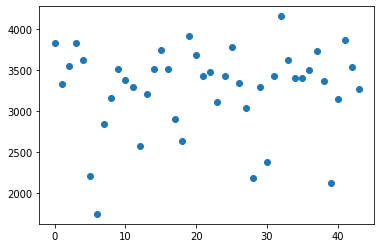

In [ ]:
x=df.Weight.values
plt.scatter(np.arange(len(x)), x)
plt.show()

 Narysujmy histogram dla <tt>df.Weight.values</tt>

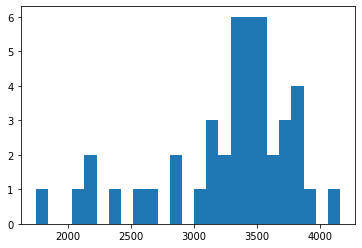

In [ ]:
plt.hist(x, bins=25)
plt.show()

Narysujmy gęstość dla <tt> df.Weight.values</tt> (estymacja jądrowa):

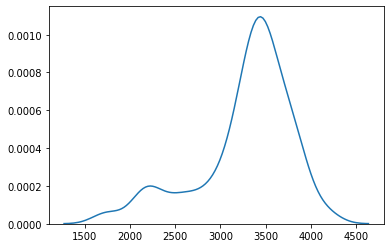

In [ ]:
import seaborn as sns
sns.kdeplot(x)
plt.show()

Narysujmy dystrybuantę empiryczną dla </tt> df.Weight.values<tt>

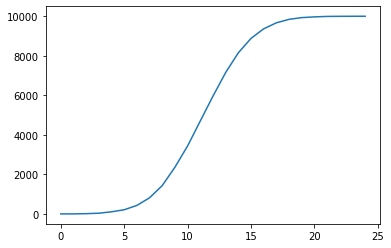

In [ ]:
from scipy import stats
plt.plot(stats.cumfreq(x,numbins=25)[0])
plt.show()

Narysujmy wykres pudełkowy dla <tt>df.Weight.values</tt>

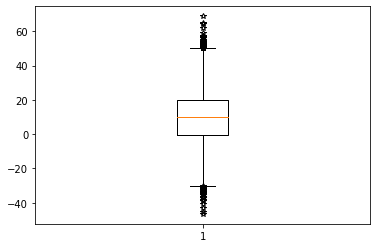

In [ ]:
plt.boxplot(x, sym='*')
plt.show()

Narysujmy wykres skrzypcowy dla <tt>df.Weight.values</tt>

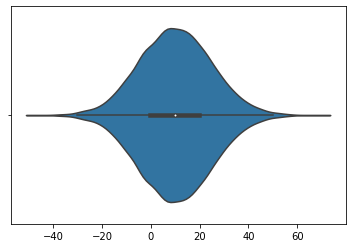

In [ ]:
sns.violinplot(x)
plt.show()